In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Flightall.csv')
df.head()

/home/razan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (59,69,72,73,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


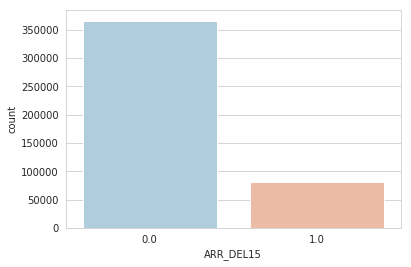

In [3]:
sns.set_style('whitegrid')
sns.countplot(x='ARR_DEL15',data=df,palette='RdBu_r')

In [4]:
df.ARR_DEL15.value_counts()

0.0    366143
1.0     80920
Name: ARR_DEL15, dtype: int64

### In given dataset we have 366143 = Not delayed flights data and 80920 = Delayed Flight data

In [20]:
# All the columns in data set
for col in df.columns: 
    print(col) 

Unnamed: 0
ACTUAL_ELAPSED_TIME
AIR_TIME
ARR_DEL15
ARR_DELAY
ARR_DELAY_GROUP
ARR_DELAY_NEW
ARR_TIME
ARR_TIME_BLK
ApparentTemperatureFahrenheit
CANCELLATION_CODE
CANCELLED
CARRIER_DELAY
CRS_ARR_TIME
CRS_DEP_TIME
CRS_ELAPSED_TIME
CloudCoveragePercent
DAY_OF_MONTH
DAY_OF_WEEK
DEP_DEL15
DEP_DELAY
DEP_DELAY_GROUP
DEP_DELAY_NEW
DEP_TIME
DEP_TIME_BLK
DEST
DEST_AIRPORT_ID
DEST_AIRPORT_SEQ_ID
DEST_CITY_MARKET_ID
DEST_CITY_NAME
DEST_STATE_ABR
DEST_STATE_NM
DISTANCE
DIVERTED
DateHrGmt
DateHrLwt
DiffuseHorizontalRadiationWsqm
DirectNormalIrradianceWsqm
DownwardSolarRadiationWsqm
FLIGHTS
FL_DATE_Hour
FL_DATE_Time
HeatIndexFahrenheit
Hour
LATE_AIRCRAFT_DELAY
Latitude
Longitude
MONTH
MslPressureMillibars
NAS_DELAY
OP_CARRIER
OP_CARRIER_AIRLINE_ID
ORIGIN
ORIGIN_AIRPORT_ID
ORIGIN_AIRPORT_SEQ_ID
ORIGIN_CITY_MARKET_ID
ORIGIN_CITY_NAME
ORIGIN_STATE_ABR
ORIGIN_STATE_NM
PotentialEvapotranspirationMicrometersPerHour
PrecipitationPreviousHourInches
QUARTER
RelativeHumidityPercent
SECURITY_DELAY
SiteId
Snowfall

In [21]:
df['cat_response']= df['DEP_DELAY_NEW'].apply(lambda x:0 if x==0 else 1)

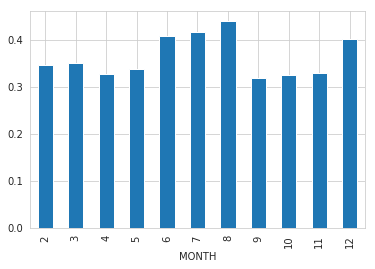

In [22]:
df.groupby('MONTH').cat_response.mean().plot(kind='bar')

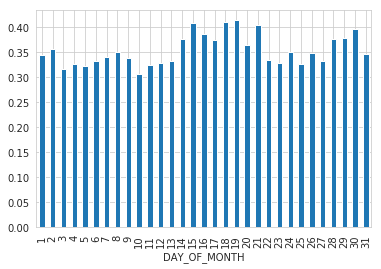

In [23]:
df.groupby('DAY_OF_MONTH').cat_response.mean().plot(kind='bar')

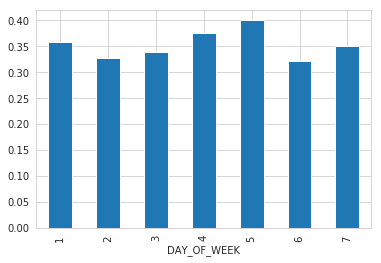

In [24]:
df.groupby('DAY_OF_WEEK').cat_response.mean().plot(kind='bar')

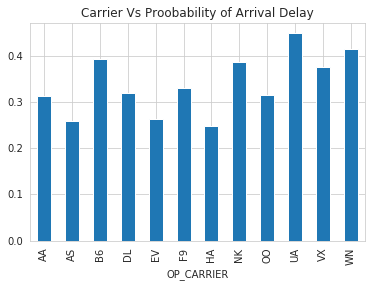

In [27]:
df.groupby('OP_CARRIER').cat_response.mean().plot(kind='bar')
fig = plt.title("Carrier Vs Proobability of Arrival Delay")

In [7]:
# Splitting month column into 5 weeks
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
df['Month'] = df["DAY_OF_MONTH"].apply(Impute_month)
#df.drop("DayofMonth", axis = 1, inplace = True)

In [8]:
Month_grouped1 = df.groupby('Month')["ARR_DEL15"].sum()
Month_grouped2 = df.groupby('Month')["ARR_DEL15"].count()
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]

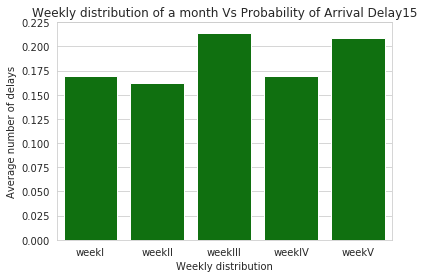

In [9]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

In [10]:
df["Flight_route"] = df["ORIGIN"] + " to " + df["DEST"]
flightroute = df.groupby('Flight_route').sum()
flightroute.sort_values(by = "ARR_DEL15", axis = 0, ascending = False, inplace = True)

In [11]:
df["Flight_route"].nunique()

719

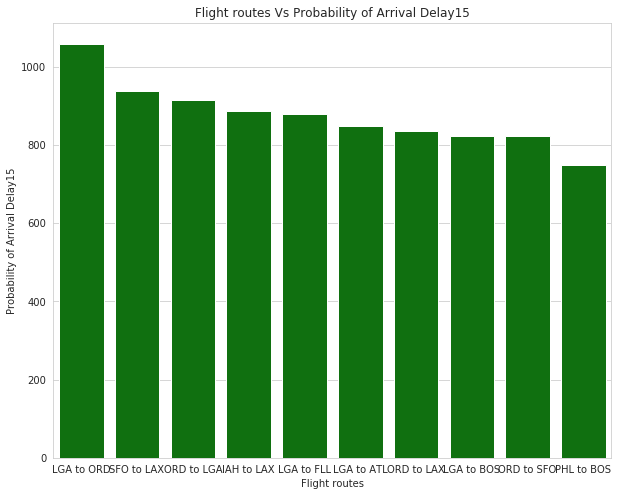

In [12]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ARR_DEL15", data=flightroute[:10], color ='green')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

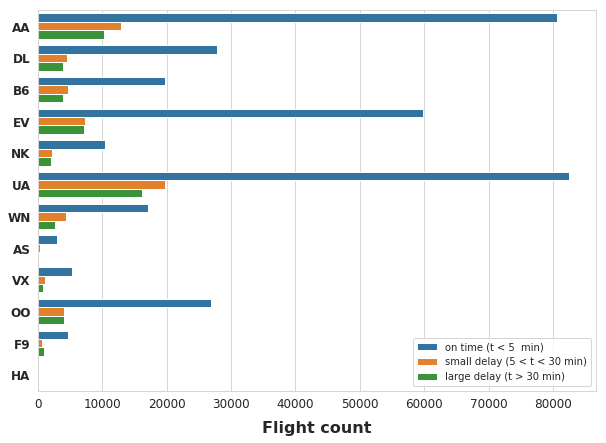

In [14]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 30]
df['DELAY_LEVEL'] = df['DEP_DELAY'].apply(delay_type)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="OP_CARRIER", hue='DELAY_LEVEL', data=df)
#labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5  min)')
L.get_texts()[1].set_text('small delay (5 < t < 30 min)')
L.get_texts()[2].set_text('large delay (t > 30 min)')
plt.show()

## This shows that UA Carrier has more large delay counts

In [16]:
Month_grouped1 = df.groupby('Month')["ARR_DEL15"].sum()
Month_grouped2 = df.groupby('Month')["ARR_DEL15"].count()
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]

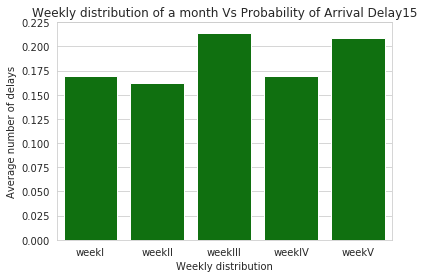

In [17]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

# Data Preprocessing

## Replacing NAN value with zero from dataset

In [28]:
df['CANCELLATION_CODE'] = df['CANCELLATION_CODE'].fillna(value=0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(value=0)
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(value=0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(value=0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(value=0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(value=0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(value=0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(value=0)
df['AIR_TIME'] = df['AIR_TIME'].fillna(value=0)
df['ACTUAL_ELAPSED_TIME'] = df['ACTUAL_ELAPSED_TIME'].fillna(value=0)
df['ARR_DELAY_GROUP'] = df['ARR_DELAY_GROUP'].fillna(value=0)
df['ARR_DEL15'] = df['ARR_DEL15'].fillna(value=0)
df['ARR_TIME'] = df['ARR_TIME'].fillna(value=0)
df['ARR_DELAY_NEW'] = df['ARR_DELAY_NEW'].fillna(value=0)
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(value=0)

In [29]:
df.drop('Unnamed: 49',axis=1,inplace=True)
df.drop('Unnamed: 0.1.1',axis=1,inplace=True)
df.drop('Unnamed: 0.1_x',axis=1,inplace=True)
df.drop('Unnamed: 0.1_y',axis=1,inplace=True)


In [30]:
df['DEP_TIME'] = df['DEP_TIME'].fillna(value=0)
df['DEP_DELAY_NEW'] = df['DEP_DELAY_NEW'].fillna(value=0)
df['DEP_DELAY_GROUP'] = df['DEP_DELAY_GROUP'].fillna(value=0)
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(value=0)
df['DEP_DEL15'] = df['DEP_DEL15'].fillna(value=0)
df['CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].fillna(value=0)

## Now checking whether there is any missing values in any columns or not ?

In [32]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Unnamed: 0,0,100.0
1,SurfaceTemperatureFahrenheit,0,100.0
2,SurfaceDewpointTemperatureFahrenheit,0,100.0
3,SurfaceAirPressureMillibars,0,100.0
4,SnowfallInches,0,100.0
5,SiteId,0,100.0
6,SECURITY_DELAY,0,100.0
7,RelativeHumidityPercent,0,100.0
8,QUARTER,0,100.0
9,PrecipitationPreviousHourInches,0,100.0


## Selecting feature variable which consist of unique(non-redundant features)

In [34]:
features=df[['YEAR','DAY_OF_MONTH','MONTH','ORIGIN_AIRPORT_ID','OP_CARRIER_AIRLINE_ID','DISTANCE','inputLongitude','inputLatitude','DEP_TIME','SurfaceTemperatureFahrenheit','SurfaceDewpointTemperatureFahrenheit','RelativeHumidityPercent','SurfaceAirPressureMillibars','CloudCoveragePercent','WindChillTemperatureFahrenheit','WindSpeedMph','WindDirectionDegrees','PrecipitationPreviousHourInches','SnowfallInches']]

In [35]:
# All the columns in data set
for col in features: 
    print(col) 

YEAR
DAY_OF_MONTH
MONTH
ORIGIN_AIRPORT_ID
OP_CARRIER_AIRLINE_ID
DISTANCE
inputLongitude
inputLatitude
DEP_TIME
SurfaceTemperatureFahrenheit
SurfaceDewpointTemperatureFahrenheit
RelativeHumidityPercent
SurfaceAirPressureMillibars
CloudCoveragePercent
WindChillTemperatureFahrenheit
WindSpeedMph
WindDirectionDegrees
PrecipitationPreviousHourInches
SnowfallInches


## The above are the feature variables for developing model

### Now Binary Classifying for target variable where 0 represent Non - delay and 1  represent delay flights

In [37]:
df['cat_response']= df['DEP_DELAY_NEW'].apply(lambda x:0 if x==0 else 1)

In [38]:
df['cat_response']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        1
11        0
12        0
13        0
14        0
15        1
16        0
17        0
18        0
19        0
20        0
21        1
22        0
23        0
24        0
25        1
26        0
27        0
28        0
29        0
         ..
453278    1
453279    0
453280    1
453281    1
453282    0
453283    1
453284    0
453285    0
453286    0
453287    0
453288    0
453289    0
453290    1
453291    1
453292    0
453293    0
453294    0
453295    0
453296    0
453297    0
453298    1
453299    1
453300    0
453301    1
453302    0
453303    1
453304    1
453305    1
453306    0
453307    0
Name: cat_response, Length: 453308, dtype: int64

In [39]:
X = features # Features              
y = df['cat_response'] # Target variable

# MODEL DEVELOPMENT

# 1. NAIVE BAYES

## Importing Necessary libraries

In [43]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

## Now Splitting the data into training data (70%) and testing data (30%)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=20000) # 70% training and 30% test

In [45]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy in percentage:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 0.6653945423661513
Accuracy in percentage: 66.53945423661513


In [48]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82389,  7057],
       [38447,  8100]])

Text(0.5, 257.44, 'Predicted label')

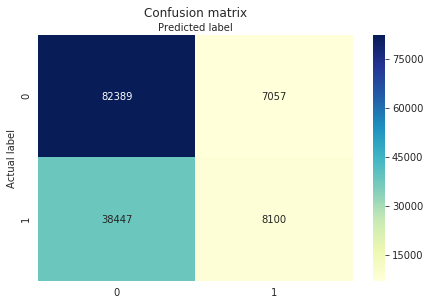

In [49]:
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
    
cal_accuracy(y_test,y_pred)

Confusion Matrix: 
  [[82389  7057]
 [38447  8100]]
Accuracy :  66.53945423661513
Report :                precision    recall  f1-score   support

           0       0.68      0.92      0.78     89446
           1       0.53      0.17      0.26     46547

   micro avg       0.67      0.67      0.67    135993
   macro avg       0.61      0.55      0.52    135993
weighted avg       0.63      0.67      0.61    135993



## ACCURACY: 66% in Naive Baye's

# 2. DECISION TREE

In [52]:
fit_y=df[['cat_response']]

In [53]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=16000)

In [54]:
#fit a classification tree with max_depth=30 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf=DecisionTreeClassifier(max_depth=30,random_state=1)
treeclf.fit(X_train1,y_train1)
Y_pred1=treeclf.predict(X_test1)

In [55]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test1,Y_pred1))
print("Accuracy in percentage: ", metrics.accuracy_score(y_test1,Y_pred1)*100)

Accuracy:  0.7542961770091108
Accuracy in percentage:  75.42961770091108


In [56]:
def cal_accuracy(y_test1, Y_pred1): 
      
    print("Confusion Matrix: \n ", 
        confusion_matrix(y_test1, Y_pred1)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test1,Y_pred1)*100) 
      
    print("Report : ", 
    classification_report(y_test1, Y_pred1)) 
    
cal_accuracy(y_test1,Y_pred1)

Confusion Matrix: 
  [[72805 16383]
 [17031 29774]]
Accuracy :  75.42961770091108
Report :                precision    recall  f1-score   support

           0       0.81      0.82      0.81     89188
           1       0.65      0.64      0.64     46805

   micro avg       0.75      0.75      0.75    135993
   macro avg       0.73      0.73      0.73    135993
weighted avg       0.75      0.75      0.75    135993



## ACCURACY in decision tree = 75%

In [57]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, Y_pred1)
cnf_matrix

array([[72805, 16383],
       [17031, 29774]])

Text(0.5, 257.44, 'Predicted label')

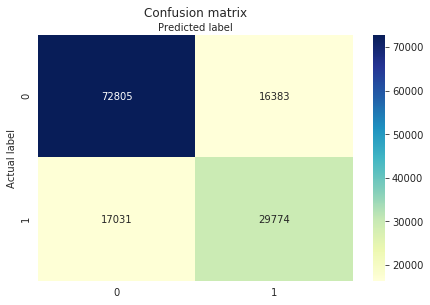

In [58]:
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 3. RANDOM FOREST

In [60]:
#fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(max_depth=30,min_samples_split=2,max_features=0.99)

In [61]:
rfc1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features=0.99, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.30)

In [69]:
rfc1.fit(X_train,y_train)
Y_pred2=rfc1.predict(X_test)

In [70]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,Y_pred2)*100)
print(metrics.classification_report(y_test, Y_pred2))

Accuracy: 78.20181921128292
              precision    recall  f1-score   support

           0       0.80      0.90      0.84     89446
           1       0.74      0.55      0.63     46547

   micro avg       0.78      0.78      0.78    135993
   macro avg       0.77      0.73      0.74    135993
weighted avg       0.78      0.78      0.77    135993



In [75]:
# import the metrics class
from sklearn import metrics
cnf_matrix1 = metrics.confusion_matrix(y_test2, Y_pred2)
cnf_matrix1

array([[66544, 22892],
       [34814, 11743]])

Text(0.5, 257.44, 'Predicted label')

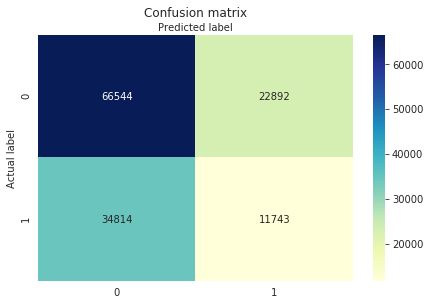

In [76]:
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [77]:
print("Mean accuracy on Training set: %s" %rfc1.score(X_train2, y_train2))
print("Mean accuracy on Test set:     %s" %rfc1.score(X_test2, y_test2))

Mean accuracy on Training set: 0.92560389518302
Mean accuracy on Test set:     0.9262462038487275


In [78]:
from sklearn.metrics import precision_score

train_predictions = rfc1.predict(X_train2)
precision_score(y_train2, train_predictions)
print("Precison of Model:",precision_score(y_train2, train_predictions))

Precison of Model: 0.9340354935922803


In [79]:
from sklearn.metrics import recall_score

recall_score(y_train2, train_predictions)
print("Recall of Model:",recall_score(y_train2, train_predictions))

Recall of Model: 0.8432913758038806


## ROC curve from Random Forest

In [81]:
from sklearn.metrics import roc_auc_score
probabilities = rfc1.predict_proba(X_test)

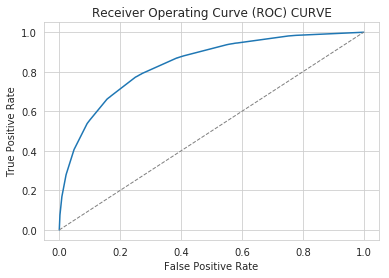

In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
fig = plt.title("Receiver Operating Curve (ROC) CURVE")

In [84]:
roc_auc_score(y_test, probabilities[:, 1])
print("ROC_AUC_SCORE:",roc_auc_score(y_test, probabilities[:, 1]))
# AUC= Area Under the Curve

ROC_AUC_SCORE: 0.8393465929268566


# 4. LOGISTIC REGRESSION

In [85]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
#clf2 = clf1.fit(X_train, y_train)
clf2.fit(X_train,y_train)
pre = clf2.predict(X_test)
pro = clf2.predict_proba(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, pre)*100)
print("ROC_AUC SCore:",metrics.roc_auc_score(y_test, pro[:, 1]))
print(clf2.score( X_test,y_test))
print(metrics.confusion_matrix(y_test, pre))
print(metrics.classification_report(y_test, pre))

/home/razan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 67.69760208246012
ROC_AUC SCore: 0.6691787484370009
0.6769760208246013
[[81146  8300]
 [35629 10918]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.79     89446
           1       0.57      0.23      0.33     46547

   micro avg       0.68      0.68      0.68    135993
   macro avg       0.63      0.57      0.56    135993
weighted avg       0.65      0.68      0.63    135993



Text(0.5, 257.44, 'Predicted label')

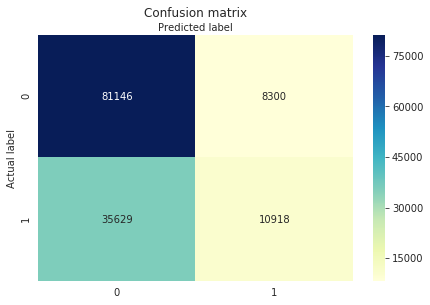

In [86]:
# import the metrics class
from sklearn import metrics
cnf_matrix2 = metrics.confusion_matrix(y_test, pre)
cnf_matrix2
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## LOGISTIC REGRESSION ACCURACY: 67%

# 5. GRADIENT BOOSTING CLASSIFIER

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
clf4 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.9, verbose=5,
                                     max_depth=4, random_state=None)
clf4 = clf4.fit(X_train2,y_train2)
pre = clf4.predict(X_test2)
pro = clf4.predict_proba(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pre)*100)
print(metrics.roc_auc_score(y_test2, pro[:, 1]))
print(clf4.score( X_test2,y_test2))
print(metrics.confusion_matrix(y_test2, pre))
print(metrics.classification_report(y_test2, pre))

      Iter       Train Loss   Remaining Time 
         1           1.2045            1.33m
         2           1.1852            1.22m
         3           1.1690            1.15m
         4           1.1605            1.09m
         5           1.1540            1.10m
         6           1.1497            1.07m
         7           1.1440            1.02m
         8           1.1375            1.01m
         9           1.1344           58.54s
        10           1.1307           57.76s
        11           1.1270           56.16s
        12           1.1246           55.16s
        13           1.1234           52.98s
        14           1.1216           51.35s
        15           1.1154           50.23s
        16           1.1121           48.74s
        17           1.1101           47.47s
        18           1.1075           45.65s
        19           1.1035           44.63s
        20           1.1014           43.09s
        21           1.0991           41.49s
        2

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test2, pre)*100)

Accuracy: 72.57652967432148


## ACCURACY OF GRADIENT BOOSTING: 72%

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/home/razan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [90]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)


## Trying to show impact of learning rate with accuracy score

In [91]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=5, max_depth=4, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    print("*****************************************************************")

Learning rate:  0.05
Accuracy score (training): 0.686
Accuracy score (validation): 0.686
Learning rate:  0.075
Accuracy score (training): 0.694
Accuracy score (validation): 0.695
Learning rate:  0.1
Accuracy score (training): 0.697
Accuracy score (validation): 0.699
Learning rate:  0.25
Accuracy score (training): 0.707
Accuracy score (validation): 0.708
Learning rate:  0.5
Accuracy score (training): 0.715
Accuracy score (validation): 0.713
Learning rate:  0.75
Accuracy score (training): 0.717
Accuracy score (validation): 0.714
Learning rate:  1
Accuracy score (training): 0.718
Accuracy score (validation): 0.713


# (Extended)X-Gradient BOOSTING

In [92]:
# X-G Gradient Boosting
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [93]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    xgb_clf = XGBClassifier(n_estimators=50, learning_rate=learning_rate, max_features=5, max_depth=4, random_state=0)
    xgb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X_val, y_val)))


Learning rate:  0.05
Accuracy score (training): 0.692
Accuracy score (validation): 0.694
Learning rate:  0.075
Accuracy score (training): 0.697
Accuracy score (validation): 0.699
Learning rate:  0.1
Accuracy score (training): 0.702
Accuracy score (validation): 0.703
Learning rate:  0.25
Accuracy score (training): 0.715
Accuracy score (validation): 0.715
Learning rate:  0.5
Accuracy score (training): 0.722
Accuracy score (validation): 0.720
Learning rate:  0.75
Accuracy score (training): 0.728
Accuracy score (validation): 0.724
Learning rate:  1
Accuracy score (training): 0.732
Accuracy score (validation): 0.725


### Using X-Gradient Boosting:This shows that at learning rate = 1 
### The accurcy score(training) increases from 0.718 (71.8%) t0 0.732 (73.2%)
### The accurcy score(validation) increases from 0.713 (71.3%) t0 0.725 (72.5%)

Text(0.5, 257.44, 'Predicted label')

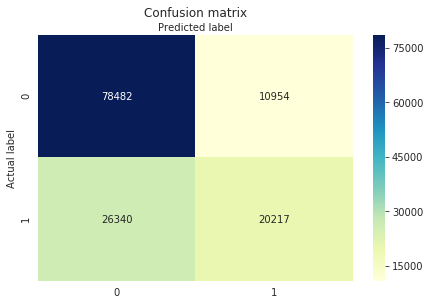

In [94]:
# import the metrics class
from sklearn import metrics

cnf_matrix4 = metrics.confusion_matrix(y_test2, pre)
cnf_matrix4
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 6. ADA-BOOST CLASSIFIER

In [96]:
from sklearn.ensemble import AdaBoostClassifier
clf5 = AdaBoostClassifier(base_estimator=LogisticRegression(class_weight=None, 
                                                               verbose=5,penalty= 'l2'),
                             n_estimators=3,
                             learning_rate=1.0, algorithm='SAMME.R',
random_state=None)
clf5 = clf5.fit(X_train2,y_train2)
pre4 = clf5.predict(X_test2)
pro4 = clf5.predict_proba(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pre4)*100)
print(metrics.roc_auc_score(y_test2, pro4[:, 1]))
print(clf5.score( X_test2,y_test2))
print(metrics.confusion_matrix(y_test2, pre4))
print(metrics.classification_report(y_test2, pre4))

/home/razan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

/home/razan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

/home/razan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]Accuracy: 67.72775069305038
0.6725811881445961
0.6772775069305038
[[81465  7971]
 [35917 10640]]
              precision    recall  f1-score   support

           0       0.69      0.91      0.79     89436
           1       0.57      0.23      0.33     46557

   micro avg       0.68      0.68      0.68    135993
   macro avg       0.63      0.57      0.56    135993
weighted avg       0.65      0.68      0.63    135993



In [97]:
print("Accuracy:",metrics.accuracy_score(y_test2, pre4)*100)

Accuracy: 67.72775069305038


## ACCURACY OF ADA BOOST= 67%

Text(0.5, 257.44, 'Predicted label')

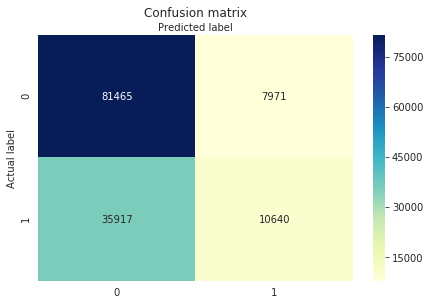

In [99]:
# import the metrics class
from sklearn import metrics

cnf_matrix5 = metrics.confusion_matrix(y_test2, pre4)
cnf_matrix5
class_names=[1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# NOW Calculating Feature variables and its importance value in the model

In [101]:
# Get numerical feature importances
importances = list(rfc1.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: DEP_TIME             Importance: 0.26
Variable: DISTANCE             Importance: 0.14
Variable: WindSpeedMph         Importance: 0.07
Variable: WindDirectionDegrees Importance: 0.07
Variable: SurfaceDewpointTemperatureFahrenheit Importance: 0.06
Variable: DAY_OF_MONTH         Importance: 0.05
Variable: OP_CARRIER_AIRLINE_ID Importance: 0.05
Variable: RelativeHumidityPercent Importance: 0.05
Variable: SurfaceAirPressureMillibars Importance: 0.05
Variable: MONTH                Importance: 0.04
Variable: SurfaceTemperatureFahrenheit Importance: 0.04
Variable: CloudCoveragePercent Importance: 0.04
Variable: WindChillTemperatureFahrenheit Importance: 0.04
Variable: ORIGIN_AIRPORT_ID    Importance: 0.02
Variable: inputLatitude        Importance: 0.02
Variable: inputLongitude       Importance: 0.01
Variable: PrecipitationPreviousHourInches Importance: 0.01
Variable: YEAR                 Importance: 0.0
Variable: SnowfallInches       Importance: 0.0


## This shows that DEP_TIME and DISTANCE are the most important variable for the accuracy of the model

# Now showing Colinearity of features

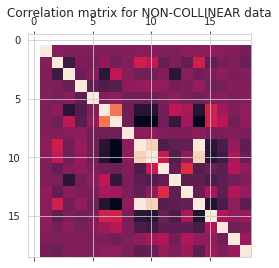

In [104]:
#Check for collinearity
plt.matshow(features.corr())
plt.title('Correlation matrix for NON-COLLINEAR data')
corr = features.corr()

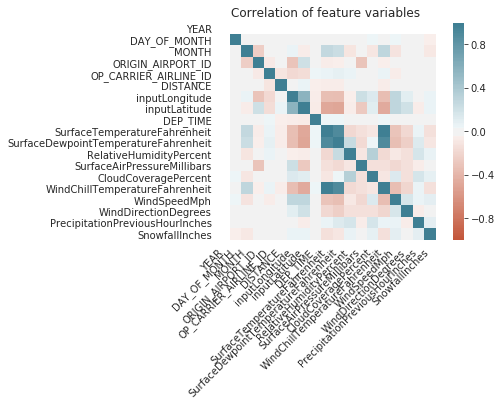

In [106]:

corr = features.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    
)
fig = plt.title("Correlation of feature variables ");

## Here dark Blue shows the more correlation of the feature variable

#### This shows that DEP_TIME , DISTANCE between two airports , WIND SPEED ,SurfaceDewpointTemperatureFahrenheit, RelativeHumidityPercent CloudCoveragePercent are the major cause for flight delays.

# NOW ANN AND KNN IN another File... Continued